In [43]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [4]:
PATH = 'logs/2020-12-06_11:21:55.523129/layer_1'

In [26]:
def get_event_file(path):
    for file in glob.glob(os.path.join(path, '*')):
        if os.path.split(file)[-1].split('.')[0] == 'events':
            return file
        
def get_event_files(path):
    event_files = {'base': get_event_file(path)}
    for file in glob.glob(os.path.join(path, '*')):
        if file.split('/')[-1].isnumeric():
            num = os.path.split(file)[-1]
            event_files[num] = get_event_file(os.path.join(path, num))
    return event_files

def get_scalar_data(file):
    acc = EventAccumulator(file)
    acc.Reload()
    scalars = acc.Tags()['scalars']

    data_dict = {}
    for scalar in scalars:
        data_dict[scalar] = [event.value for event in acc.Scalars(scalar)]

    return pd.DataFrame(data_dict)

In [66]:
files = get_event_files(PATH)
activation_data = []
for label, path in files.items():
    if label.isnumeric():
        table = get_scalar_data(data[label])
        activation_data.append([score for score in table.iloc[-1]])
activation_data = np.array(activation_data).transpose(1, 0)

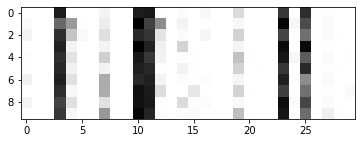

In [67]:
plt.imshow(activation_data, cmap='gray_r')